<a href="https://colab.research.google.com/github/michaelloewenstein/fastai/blob/master/fastai_01_cat_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastbook --upgrade -qqq
import fastbook
fastbook.setup_book()


     |████████████████████████████████| 727kB 8.2MB/s 
     |████████████████████████████████| 1.2MB 17.3MB/s 
     |████████████████████████████████| 51kB 9.1MB/s 
     |████████████████████████████████| 194kB 51.6MB/s 
     |████████████████████████████████| 61kB 9.6MB/s 
Mounted at /content/gdrive


In [ ]:

import os
key = os.environ.get('AZURE_SEARCH_KEY', 'XXX')

In [ ]:
from fastbook import *
from fastai.vision.widgets import *

results = search_images_bing(key, 'grey cats')
ims = results.attrgot('content_url')
len(ims)


150

In [ ]:
bear_types = 'grey','black','white'
path = Path('cats')


In [ ]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} cat')
        download_images(dest, urls=results.attrgot('contentUrl'))


In [ ]:
fns = get_image_files(path)



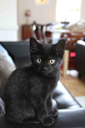

In [ ]:
im = Image.open('cats/black/00000041.jpg')
im.to_thumb(128,128)


In [ ]:
failed = verify_images(fns)
failed.map(Path.unlink);

In [ ]:
cats = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))


In [ ]:
dls = cats.dataloaders(path)


In [ ]:
cats = cats.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = cats.dataloaders(path)


In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.542781,0.607348,0.289157,00:12


epoch,train_loss,valid_loss,error_rate,time
0,0.444364,0.314549,0.120482,00:12
1,0.336142,0.257243,0.072289,00:12
2,0.261606,0.255363,0.060241,00:12
3,0.240830,0.233770,0.048193,00:12


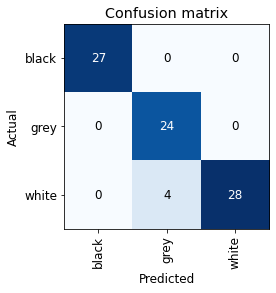

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


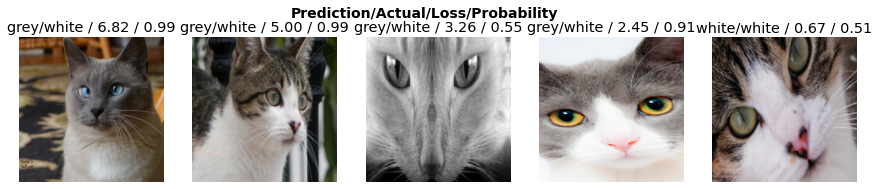

In [ ]:
interp.plot_top_losses(5, nrows=1)


In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner


In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()


In [ ]:
learn.export()


In [ ]:
learn_inf = load_learner('export.pkl')

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload




FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload)


IndexError: ignored

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)
